In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx

In [12]:
network_features_path = f"../../data/features/network_features/binarized_weighted/features.csv"
species_features_path = f"../../data/features/plant_features/binarized_weighted/features.csv"
networks_dir = f"../../data/networks/all/binarized_weighted/"

In [25]:
network_featrues = pd.read_csv(network_features_path)
species_features = pd.read_csv(species_features_path)
species_features = species_features.dropna(subset=["d", "betweenness", "closeness"])

In [26]:
species_features["d_bin"] = pd.cut(species_features.d, bins=10)
d_bins = species_features["d_bin"].drop_duplicates().sort_values().tolist()
species_features_by_d_bin = species_features.groupby("d_bin")

In [31]:
generalist_example = species_features_by_d_bin.get_group(d_bins[0]).iloc[0][["network_id", "d", "Plant"]]
generalist_example

network_id                    1
d                       0.06009
Plant         Berberis darwinii
Name: 3, dtype: object

In [32]:
specialist_example = species_features_by_d_bin.get_group(d_bins[-1]).iloc[0][["network_id", "d", "Plant"]]
specialist_example

network_id                   2
d                          1.0
Plant         Cynanchum diemii
Name: 15, dtype: object

In [33]:
generalist_example_network_path = f"{networks_dir}/{generalist_example.network_id}.csv"
specialist_example_network_path = f"{networks_dir}/{specialist_example.network_id}.csv"

In [62]:
def parse_network(network_path: str):
    
    network = pd.read_csv(network_path).set_index("Plant").astype(bool)
    interacting_pairs = df.where(df).stack().index.set_names(['plant', 'pollinator']).tolist()
    interacting_plants = [pair[0] for pair in interacting_pairs]
    interacting_pollinators = [pair[1] for pair in interacting_pairs]
    
    B = nx.Graph()
    B.add_nodes_from(interacting_pairs, bipartite=0)
    B.add_nodes_from(interacting_pollinators, bipartite=1)
    B.add_weighted_edges_from(
        [(interacting_plants[i], interacting_pollinators[i], 1) for i in range(len(interacting_pairs))], 
        weight='weight')

    print(B.edges(data=True))

    pos = {node:[0, i] for i,node in enumerate(interacting_plants)}
    pos.update({node:[1, i] for i,node in enumerate(interacting_pollinators)})
    for p in pos:  # raise text positions
        pos[p][1] += 0.25
        
    return B, pos

In [63]:
G, pos = parse_network(generalist_example_network_path)

[('Colletidae', 'Aristotelia chilensis', {'weight': 1}), ('Colletidae', 'Schinus patagonicus', {'weight': 1}), ('Colletidae', 'Berberis darwinii', {'weight': 1}), ('Colletidae', 'Ribes magellanicum', {'weight': 1}), ('Halictidae', 'Aristotelia chilensis', {'weight': 1}), ('Halictidae', 'Alstroemeria aurea', {'weight': 1}), ('Halictidae', 'Schinus patagonicus', {'weight': 1}), ('Acroceridae', 'Alstroemeria aurea', {'weight': 1}), ('Andrenidae', 'Alstroemeria aurea', {'weight': 1}), ('Apidae', 'Alstroemeria aurea', {'weight': 1}), ('Apidae', 'Berberis darwinii', {'weight': 1}), ('Apidae', 'Vicia nigricans', {'weight': 1}), ('Apidae', 'Rosa eglanteria', {'weight': 1}), ('Apidae', 'Calceolaria crenatiflora', {'weight': 1}), ('Bombilidae', 'Alstroemeria aurea', {'weight': 1}), ('Bombilidae', 'Rosa eglanteria', {'weight': 1}), ('Buprestidae', 'Alstroemeria aurea', {'weight': 1}), ('Buprestidae', 'Mutisia decurrens', {'weight': 1}), ('Megachilidae', 'Alstroemeria aurea', {'weight': 1}), ('Nem

In [66]:
pos

{'Aristotelia chilensis': [0, 1.25],
 'Alstroemeria aurea': [0, 13.25],
 'Schinus patagonicus': [0, 18.25],
 'Berberis darwinii': [0, 20.25],
 'Vicia nigricans': [0, 21.25],
 'Rosa eglanteria': [0, 25.25],
 'Cynanchum diemii': [0, 26.25],
 'Ribes magellanicum': [0, 27.25],
 'Mutisia decurrens': [0, 28.25],
 'Calceolaria crenatiflora': [0, 29.25],
 'Colletidae': [1, 27.25],
 'Halictidae': [1, 16.25],
 'Acroceridae': [1, 2.25],
 'Andrenidae': [1, 3.25],
 'Apidae': [1, 29.25],
 'Bombilidae': [1, 23.25],
 'Buprestidae': [1, 28.25],
 'Megachilidae': [1, 8.25],
 'Nemestrinidae': [1, 9.25],
 'Sphecidae': [1, 10.25],
 'Syrphidae': [1, 25.25],
 'Thomisidae': [1, 12.25],
 'Vespidae': [1, 18.25],
 'Formicidae': [1, 15.25],
 'Lauxaniidae': [1, 24.25],
 'Torymidae': [1, 26.25]}

KeyError: ('Aristotelia chilensis', 'Colletidae')

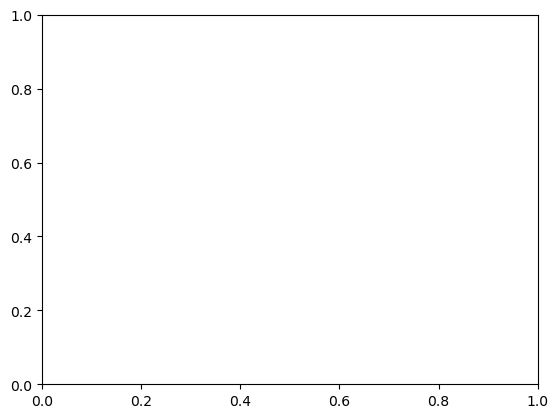

In [65]:
nx.draw_networkx_labels(G, pos)
plt.show()